In [ ]:
import pandas as pd
import numpy as np
import plotly.offline as plt
import plotly.graph_objs as go

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving response.csv to response.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['response.csv']))

In [ ]:
df.head(10)

,Timestamp,Please select your age group.(AQ1),Please specify your gender.(AQ2),Do you agree that virtual education is the future of E-learning?(AQ3),Do you think that virtual classes are effective as in-person physical classes?(AQ4),How motivated are you to take E-learning as a primary medium of your source of education?(AQ5),"Based on your experience, which one do you support most?(AQ6)",Does E-learning/virtual classes affect the teacher-student relationship?(AQ7),How well do you think E-learning/virtual classes affect the teacher-student relationship?(AQ8),Do E-learning/virtual classes have a Behavioral Impact on students?(AQ9),What kind of behavioral Impact do E-learning/virtual classes have on students?(AQ10),Does E-learning have a financial Impact on students?(AQ11),Do you think e-learning increases student's academic workload?(AQ12),Have you ever faced complications in attending virtual classes?(AQ13),What is the number of complications you faced to attend virtual classes?(AQ14),Do you think that e-learning lets students access a wide range of tools and technology that enriches student's learning experience?(AQ15),Does e-learning affect your time management?(AQ16),What is the effect on your time management due to e-learning?(AQ17),What impact does e-learning have on your food habit? Please specify the appropriate options from below which fit you the most.(AQ18),Which of the following best describes your physical weight due to e-learning?(AQ19),How likely is it that e-learning affecting your sleep cycles?(AQ20),What effect does daily use of e-learning have on your psychology?(AQ21),Does e-learning affect your family relationship?(AQ22),In which ways does e-learning affect your family relationship?(AQ23)
0,10/18/2021 16:57:45,20-24,Male,Agree,Yes,Highly,Both,No,Positively,No,Positive,No,Yes,Yes,Less,Yes,Yes,Makes punctual,Regular,Increased,Not affecting at all,Positive,No,Nothing changed
1,10/18/2021 16:57:53,20-24,Male,Agree,Yes,Highly,Virtual classes,No,Negatively,No,Not at all,No,Yes,Yes,More,Yes,No,Makes punctual,Irregular,Increased,Not affecting at all,Positive,No,Nothing changed
2,10/18/2021 16:58:08,20-24,Female,Agree,Yes,Medium,Both,Yes,Positively,Yes,Positive,Yes,Yes,Yes,Less,Yes,No,Makes punctual,Regular,No changes,Not affecting at all,Positive,No,Nothing changed
3,10/18/2021 17:03:32,20-24,Male,Agree,No,Medium,Both,Yes,Not at all,Yes,Negative,Yes,No,Yes,More,Yes,Yes,Makes punctual,No changes at all,Increased,Not affecting at all,Negative,No,Nothing changed
4,10/18/2021 17:09:30,20-24,Male,Agree,No,Highly,Virtual classes,No,Positively,No,Positive,Yes,Yes,No,Not at all,Yes,Yes,Makes punctual,No changes at all,Increased,Regular,Positive,No,Nothing changed
5,10/18/2021 17:16:12,20-24,Male,Agree,Yes,Highly,Virtual classes,No,Positively,Yes,Positive,No,Yes,Yes,Less,Yes,Yes,Makes punctual,Regular,No changes,Irregular,Positive,No,Increased bonding
6,10/18/2021 17:17:55,20-24,Male,Agree,No,Highly,Virtual classes,Yes,Negatively,Yes,Positive,No,Yes,Yes,Less,Yes,Yes,Makes punctual,Regular,Increased,Irregular,Positive,Yes,Increased bonding
7,10/18/2021 17:23:42,20-24,Male,Agree,No,Low,In-person physical classes,Yes,Negatively,Yes,Negative,Yes,Yes,Yes,More,No,Yes,Ends up being late,Irregular,Increased,Irregular,Negative,Yes,Decreased bonding
8,10/18/2021 17:24:16,25-29,Male,Agree,No,Medium,In-person physical classes,Yes,Negatively,Yes,Negative,Yes,Yes,Yes,Less,Yes,No,Makes punctual,Irregular,Increased,Not affecting at all,Positive,No,Nothing changed
9,10/18/2021 17:25:00,20-24,Male,Agree,Yes,Medium,Both,Yes,Positively,Yes,Positive,Yes,No,Yes,Less,Yes,Yes,Makes punctual,Regular,No changes,Irregular,Positive,Yes,Increased bonding


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



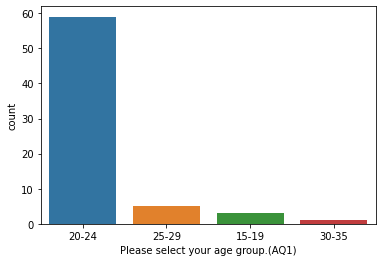

In [ ]:
import seaborn as sns
sns.countplot(df["Please select your age group.(AQ1)"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



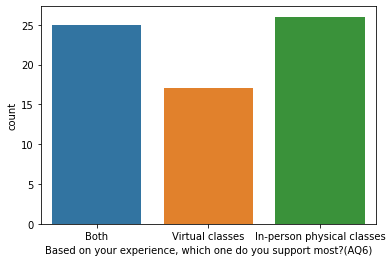

In [ ]:
import seaborn as sns
sns.countplot(df["Based on your experience, which one do you support most?(AQ6)"])


(array([25.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 17.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0., 26.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <a list of 20 Patch objects>)

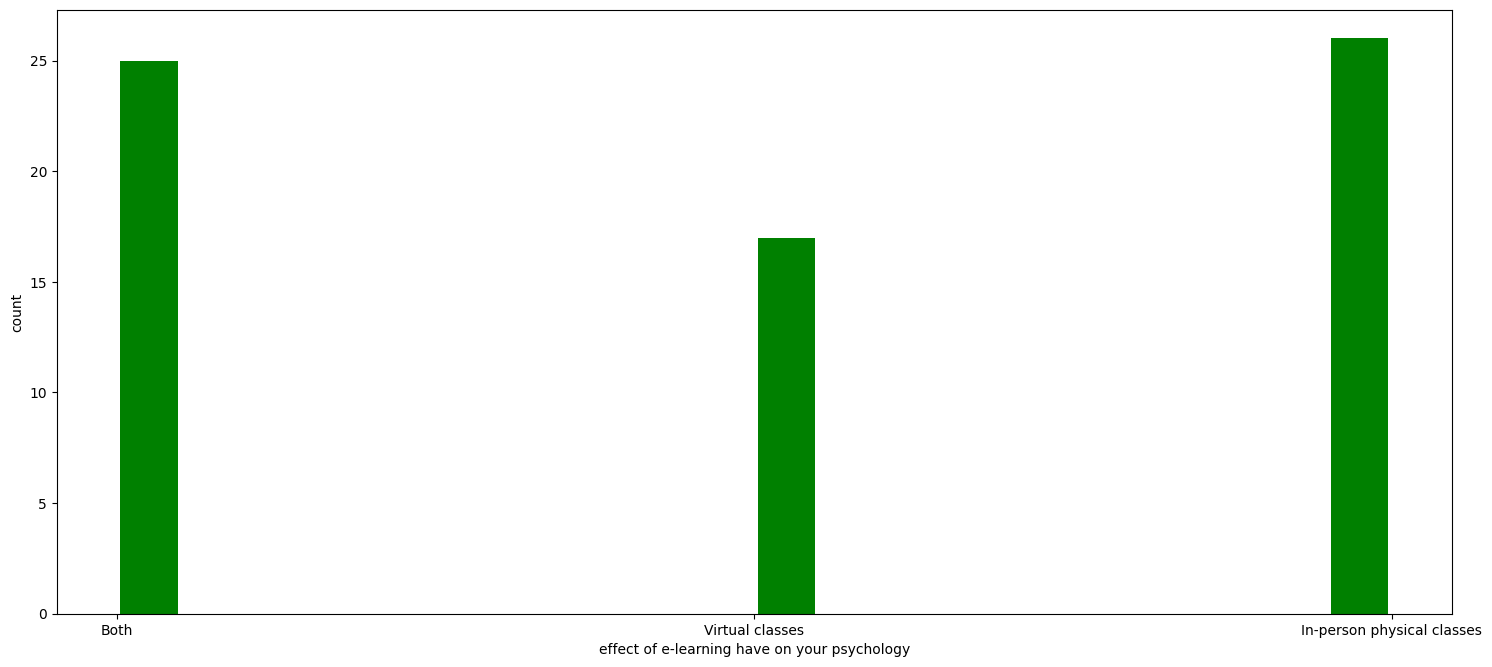

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
plt.figure(figsize=(18,8),dpi=100)
plt.xlabel("effect of e-learning have on your psychology")
plt.ylabel("count")
plt.hist(df['Based on your experience, which one do you support most?(AQ6)'],bins=20,color='green',rwidth=0.9)

(array([30.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 26.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0., 12.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <a list of 20 Patch objects>)

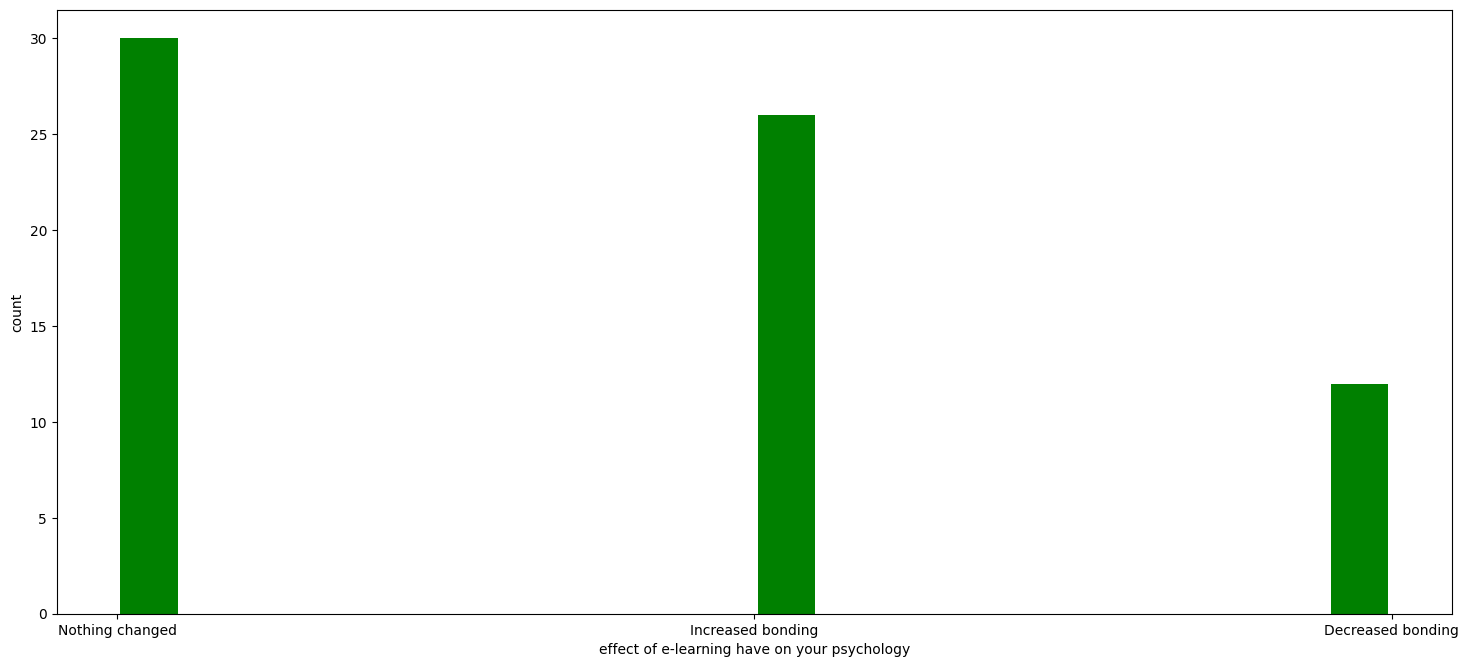

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
plt.figure(figsize=(18,8),dpi=100)
plt.xlabel("effect of e-learning have on your psychology")
plt.ylabel("count")
plt.hist(df['In which ways does e-learning affect your family relationship?(AQ23)'],bins=20,color='green',rwidth=0.9)

In [ ]:
fig = px.scatter_3d(df, 
                    x=df["What is the effect on your time management due to e-learning?(AQ17)"],
                    y=df["Please select your age group.(AQ1)"], 
                    z=df["Based on your experience, which one do you support most?(AQ6)"],
                    color=df["What is the number of complications you faced to attend virtual classes?(AQ14)"],
                    color_discrete_sequence=['#636EFA','#EF553B','#00CC96'], 
                    hover_data=["Does E-learning/virtual classes affect the teacher-student relationship?(AQ7)", 
                                'Do you agree that virtual education is the future of E-learning?(AQ3)'],
                    height=900, width=900
                   )

fig.update_layout(
                  showlegend=True,
                  legend=dict(orientation="h", yanchor="top", y=1, xanchor="center", x=0.5),
                  scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                        center=dict(x=0, y=0, z=-0.2),
                                        eye=dict(x=-1.5, y=1.5, z=0.5)),
                                        margin=dict(l=0, r=0, b=0, t=0),
                  scene = dict(xaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                          dtick=0.01,
                                         ),
                               yaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                          dtick=0.01,
                                          ),
                               zaxis=dict(backgroundcolor='lightgrey',
                                          color='black', 
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                          dtick=5
                                         )))

# Update marker size
fig.update_traces(marker=dict(size=2))

fig.show()

In [ ]:

from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor 

scaler = MinMaxScaler()
df['What is the effect on your time management due to e-learning?(AQ17) scl']=scaler.fit_transform(df[['What is the effect on your time management due to e-learning?(AQ17)']])
df['Please select your age group.(AQ1) scl']=scaler.fit_transform(df[['Please select your age group.(AQ1)']])
df['Based on your experience, which one do you support most?(AQ6) scl']=scaler.fit_transform(df[['Based on your experience, which one do you support most?(AQ6)']])


enc=OrdinalEncoder() 
df['What is the number of complications you faced to attend virtual classes?(AQ14) enc']=enc.fit_transform(df[['What is the number of complications you faced to attend virtual classes?(AQ14)']]) # encode categorical values

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

X_train=df_train[['What is the effect on your time management due to e-learning?(AQ17) scl', 
                  'Please select your age group.(AQ1) scl',
                  'Based on your experience, which one do you support most?(AQ6) scl']]
X_test=df_test[['What is the effect on your time management due to e-learning?(AQ17)  scl',
                'Please select your age group.(AQ1) scl', 
                'Based on your experience, which one do you support most?(AQ6) scl']]

yC_train=df_train['What is the number of complications you faced to attend virtual classes?(AQ14) enc'].ravel()
yC_test=df_test['What is the number of complications you faced to attend virtual classes?(AQ14) enc'].ravel()

yR_train=df_train['Do you agree that virtual education is the future of E-learning?(AQ3)'].ravel()
yR_test=df_test['Do you agree that virtual education is the future of E-learning?(AQ3)'].ravel()



modelC = KNeighborsClassifier(n_neighbors=5, 
                              weights='uniform', 
                              algorithm='auto', 
                              metric_params=None, 
                              n_jobs=-1
                            ) 


#model parameters
modelR = KNeighborsRegressor(n_neighbors=10, 
                             weights='uniform', 
                             algorithm='kd_tree',
                            
                             metric_params=None,
                             n_jobs=-1 
                            )


#Fit  models
clf = modelC.fit(X_train, yC_train)
reg = modelR.fit(X_train, yR_train)

# Prediction training data
pred_labels_tr = modelC.predict(X_train)
pred_values_tr = modelR.predict(X_train)

# Prediction a test data
pred_labels_te = modelC.predict(X_test)
pred_values_te = modelR.predict(X_test)

# model info
  
print('Classes: ', clf.classes_)
print('Effective Metric: ', clf.effective_metric_)
print('Effective Metric Params: ', clf.effective_metric_params_)
print('No. of Samples Fit: ', clf.n_samples_fit_)
scoreC_te = modelC.score(X_test, yC_test)
print('Accuracy Score: ', scoreC_te)

print(classification_report(yC_test, pred_labels_te))

scoreC_tr = modelC.score(X_train, yC_train)
print('Accuracy Score: ', scoreC_tr)
print(classification_report(yC_train, pred_labels_tr))



# model info
 
print('Effective Metric: ', reg.effective_metric_)
print('Effective Metric Params: ', reg.effective_metric_params_)
print('No. of Samples Fit: ', reg.n_samples_fit_)
scoreR_te = modelR.score(X_test, yR_test)
print('Test Accuracy Score: ', scoreR_te)
scoreR_tr = modelR.score(X_train, yR_train)
print('Training Accuracy Score: ', scoreR_tr)


In [ ]:
x= df.iloc[:,0:13].values 
y= df['Please select your age group.(AQ1)'].values
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)

ValueError: ignored